In [1]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
import warnings
warnings.filterwarnings('ignore')


model = VGG16(include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear3
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import decode_predictions

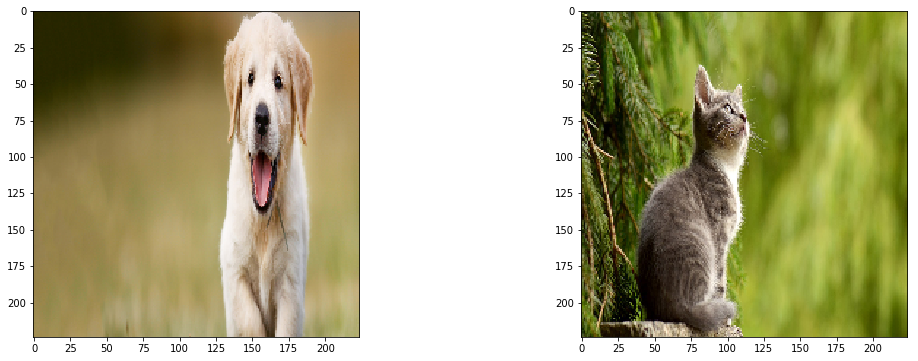

In [3]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('test.jpg', target_size=(224, 224))
img2 = utils.load_img('test1.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [4]:
import pandas as pd
index = pd.read_json("imagenet_class_index.json")

In [5]:
import numpy as np
img = []
img.append(img1)
img.append(img2)
img = np.array(img)
ans = model.predict(img)

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node block1_conv1_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](block1_conv1_1/convolution-0-TransposeNHWCToNCHW-LayoutOptimizer, block1_conv1_1/kernel/read)]]
	 [[{{node predictions_1/BiasAdd/_455}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_174_predictions_1/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
index[np.argmax(ans[0])]

In [ ]:
index[np.argmax(ans[1])]

In [ ]:
index_ = [267, 285]

In [ ]:
from vis.visualization import visualize_saliency
for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        grads = visualize_saliency(model, layer_idx, filter_indices=100, 
                                   seed_input=img, backprop_modifier=modifier)
        ax[i].imshow(grads, cmap='jet')

In [ ]:
index[100]

In [7]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

penultimate_layer = utils.find_layer_idx(model, 'res5c_branch2c')

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=index_[i], 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

ValueError: No layer with name 'res5c_branch2c' within the model

In [ ]:
index[20]

In [9]:
from vis.input_modifiers import Jitter
from vis.visualization import visualize_activation

img = visualize_activation(model, layer_idx, filter_indices=20, max_iter=3000, input_modifiers=[Jitter(16)])
plt.imshow(img)

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node block1_conv1_1/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@gradients/block1_conv1_1/convolution_grad/Conv2DBackpropInput"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](block1_conv1_1/convolution-0-TransposeNHWCToNCHW-LayoutOptimizer, block1_conv1_1/kernel/read)]]
	 [[{{node add_3/_471}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_529_add_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
img3 = np.random.rand(224, 224, 3)

In [ ]:
plt.imshow(img3)

In [ ]:
grads = visualize_saliency(model, layer_idx, filter_indices=999, 
                                   seed_input=img3, backprop_modifier='guided')


In [ ]:
plt.imshow(grads)

In [ ]:
for i in range(224):
    for j in range(224):
        if grads[i, j] > 0.02:
            grads[i, j] = 1 
        else:
            grads[i, j] = 0

In [ ]:
plt.imshow(grads)

In [ ]:
for i in [1, 100, 256, 678]:
    grads = visualize_saliency(model, layer_idx, filter_indices=i, 
                                       seed_input=img1, backprop_modifier='guided')


    # for i in range(224):
    #     for j in range(224):
    #         if grads[i, j] > 0.02:
    #             grads[i, j] = 1 
    #         else:
    #             grads[i, j] = 0

    plt.imshow(grads)
    plt.show()

    plt.imshow(overlay(img1, np.uint8(cm.jet(grads)[..., :3] * 255)))
    plt.show()

In [ ]:
for i in [1, 100, 256, 678]:
    grads = visualize_saliency(model, layer_idx, filter_indices=i, 
                                       seed_input=img2, backprop_modifier='guided')


    # for i in range(224):
    #     for j in range(224):
    #         if grads[i, j] > 0.02:
    #             grads[i, j] = 1 
    #         else:
    #             grads[i, j] = 0

    plt.imshow(grads)
    plt.show()

    plt.imshow(overlay(img2, np.uint8(cm.jet(grads)[..., :3] * 255)))
    plt.show()

In [ ]:
img3 = utils.load_img('download.jfif', target_size=(224, 224))
for i in [1, 100, 256, 678]:
    grads = visualize_saliency(model, layer_idx, filter_indices=i, 
                                       seed_input=img3, backprop_modifier='guided')


    # for i in range(224):
    #     for j in range(224):
    #         if grads[i, j] > 0.02:
    #             grads[i, j] = 1 
    #         else:
    #             grads[i, j] = 0

    plt.imshow(grads)
    plt.show()

    plt.imshow(overlay(img3, np.uint8(cm.jet(grads)[..., :3] * 255)))
    plt.show()